In [21]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# import citipy
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# import requests dependency
import requests

In [7]:
# bring in weather API key
from config import weather_api_key

In [8]:
# create the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# create a for loop to loop through all cities in list
for i, city in enumerate(cities):

    # group cities in set of 50 for logging purposes (free tier only allows 60 calls per minute)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | ballater
Processing Record 7 of Set 1 | killybegs
Processing Record 8 of Set 1 | pyay
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | faratsiho
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | whitianga
Processing Record 22 of Set 1 | jamestown
Processi

Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | agropoli
Processing Record 40 of Set 4 | kidal
Processing Record 41 of Set 4 | chicama
Processing Record 42 of Set 4 | paradwip
City not found. Skipping...
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | ondjiva
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | vanimo
Processing Record 47 of Set 4 | barbar
City not found. Skipping...
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | iqaluit
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | sampit
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | wahiawa
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | yazman
Processing Record 7 of Set 5 | bella vista
Processing Record 8 of Set 5 | lascahobas
Processing Record 9 of Set 5 | iskele
Processing Record 10 of Set 5 | uruzgan
P

Processing Record 29 of Set 8 | nakusp
Processing Record 30 of Set 8 | windhoek
Processing Record 31 of Set 8 | kachikau
City not found. Skipping...
Processing Record 32 of Set 8 | moerai
Processing Record 33 of Set 8 | san vicente
Processing Record 34 of Set 8 | bargal
City not found. Skipping...
Processing Record 35 of Set 8 | amarante do maranhao
Processing Record 36 of Set 8 | killarney
Processing Record 37 of Set 8 | boyolangu
Processing Record 38 of Set 8 | pathein
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | alexander city
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | barillas
Processing Record 43 of Set 8 | azare
Processing Record 44 of Set 8 | batemans bay
Processing Record 45 of Set 8 | berlevag
Processing Record 46 of Set 8 | pitimbu
Processing Record 47 of Set 8 | praia
Processing Record 48 of Set 8 | balykshi
Processing Record 49 of Set 8 | bajil
Processing Record 50 of Set 8 | caranavi
Processing Record 1 of Set 9 | shim

Processing Record 15 of Set 12 | tautira
Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | santa isabel do rio negro
Processing Record 18 of Set 12 | tra vinh
Processing Record 19 of Set 12 | boquira
Processing Record 20 of Set 12 | senador jose porfirio
Processing Record 21 of Set 12 | tevriz
Processing Record 22 of Set 12 | haian
Processing Record 23 of Set 12 | thaba-tseka
Processing Record 24 of Set 12 | tigil
Processing Record 25 of Set 12 | melfi
Processing Record 26 of Set 12 | varsag
Processing Record 27 of Set 12 | severo-yeniseyskiy
Processing Record 28 of Set 12 | barreirinhas
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | shahrud
Processing Record 31 of Set 12 | lorengau
Processing Record 32 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 33 of Set 12 | takestan
Processing Record 34 of Set 12 | roseburg
Processing Record 35 of Set 12 | biak
Processing Record 36 of Set 12 | kaeo
Processing Record 37 of 

In [12]:
len(city_data)

570

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,62.28,86,90,4.61,AU,2022-01-22 16:27:47
1,Puerto Ayora,-0.7393,-90.3518,78.76,75,97,7.23,EC,2022-01-22 16:31:14
2,Rikitea,-23.1203,-134.9692,77.92,70,100,10.65,PF,2022-01-22 16:32:27
3,Kruisfontein,-34.0033,24.7314,80.89,60,18,20.29,ZA,2022-01-22 16:32:28
4,Severo-Kurilsk,50.6789,156.1250,27.19,76,99,13.67,RU,2022-01-22 16:32:15
5,Ballater,57.0493,-3.0402,48.00,86,68,5.84,GB,2022-01-22 16:32:28
6,Killybegs,54.6333,-8.4500,47.91,84,80,10.42,IE,2022-01-22 16:32:29
7,Pyay,18.8167,95.2167,64.20,55,9,1.97,MM,2022-01-22 16:32:29
8,Albany,42.6001,-73.9662,22.48,62,3,1.01,US,2022-01-22 16:30:02
9,Khatanga,71.9667,102.5000,12.70,93,100,14.32,RU,2022-01-22 16:32:30


In [17]:
# Rearrange the column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-01-22 16:27:47,-42.8794,147.3294,62.28,86,90,4.61
1,Puerto Ayora,EC,2022-01-22 16:31:14,-0.7393,-90.3518,78.76,75,97,7.23
2,Rikitea,PF,2022-01-22 16:32:27,-23.1203,-134.9692,77.92,70,100,10.65
3,Kruisfontein,ZA,2022-01-22 16:32:28,-34.0033,24.7314,80.89,60,18,20.29
4,Severo-Kurilsk,RU,2022-01-22 16:32:15,50.6789,156.1250,27.19,76,99,13.67
...,...,...,...,...,...,...,...,...,...
565,Sabang,ID,2022-01-22 16:47:59,5.8933,95.3214,81.82,72,12,6.98
566,Palmeira,BR,2022-01-22 16:47:59,-25.4294,-50.0064,85.62,47,2,1.70
567,Sorland,NO,2022-01-22 16:47:59,67.6670,12.6934,42.51,91,100,40.49
568,Brigantine,US,2022-01-22 16:48:00,39.4101,-74.3646,32.05,61,0,8.05


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

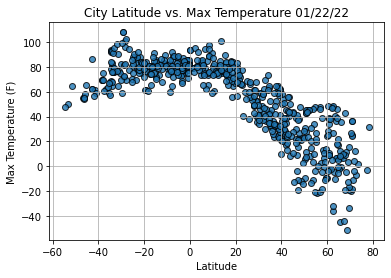

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

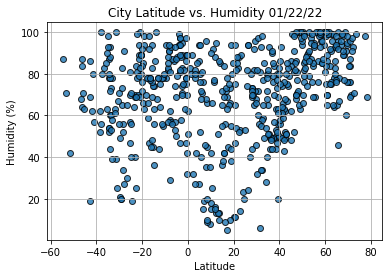

In [27]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

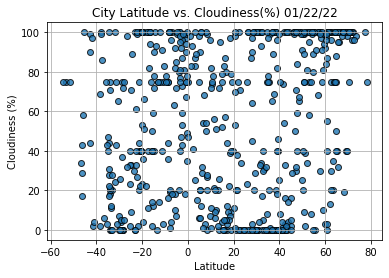

In [29]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

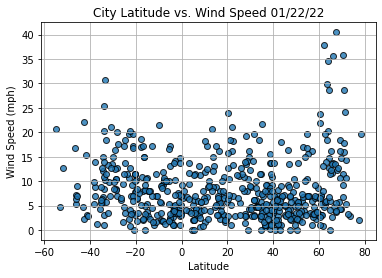

In [31]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# test to get the info for the city at index 13
index13 = city_data_df.loc[13]

index13

City                       Atuona
Country                        PF
Date          2022-01-22 16:32:31
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.44
Humidity                       78
Cloudiness                     78
Wind Speed                  21.52
Name: 13, dtype: object

In [35]:
# test to filter for Northern Hempisphere latitudes (0-90)
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
565     True
566    False
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [42]:
# get all cities with latitudes in Northern Hempisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Severo-Kurilsk,RU,2022-01-22 16:32:15,50.6789,156.1250,27.19,76,99,13.67
5,Ballater,GB,2022-01-22 16:32:28,57.0493,-3.0402,48.00,86,68,5.84
6,Killybegs,IE,2022-01-22 16:32:29,54.6333,-8.4500,47.91,84,80,10.42
7,Pyay,MM,2022-01-22 16:32:29,18.8167,95.2167,64.20,55,9,1.97
8,Albany,US,2022-01-22 16:30:02,42.6001,-73.9662,22.48,62,3,1.01


In [41]:
# get all cities with latitudes in the Southern Hempisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-01-22 16:27:47,-42.8794,147.3294,62.28,86,90,4.61
1,Puerto Ayora,EC,2022-01-22 16:31:14,-0.7393,-90.3518,78.76,75,97,7.23
2,Rikitea,PF,2022-01-22 16:32:27,-23.1203,-134.9692,77.92,70,100,10.65
3,Kruisfontein,ZA,2022-01-22 16:32:28,-34.0033,24.7314,80.89,60,18,20.29
10,Kununurra,AU,2022-01-22 16:32:30,-15.7667,128.7333,80.58,94,40,0.00


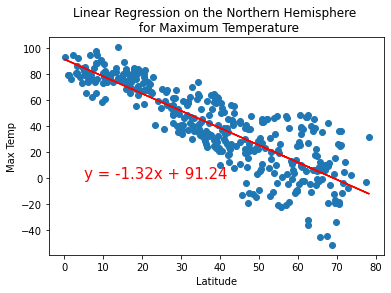

(-1.3183575115798438,
 91.23589453816373,
 -0.8432946168029383,
 9.945856773549994e-101,
 0.04391902220205742)

In [61]:
# perform a linear regression for the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (5,0))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

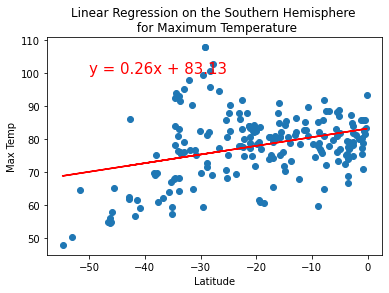

(0.2619416990185268,
 83.13468723354713,
 0.3379596710084206,
 8.698370786939786e-07,
 0.051580850412521514)

In [62]:
# perform a linear regression for the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-50,100))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

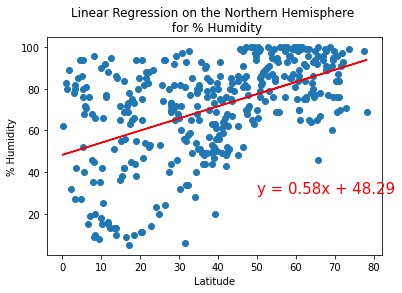

(0.5838721761559887,
 48.29119434463797,
 0.5005675043932923,
 9.840023003764633e-25,
 0.05278138124376967)

In [63]:
# perform a linear regression for the northern hemisphere - HUMIDITY
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (50,30))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

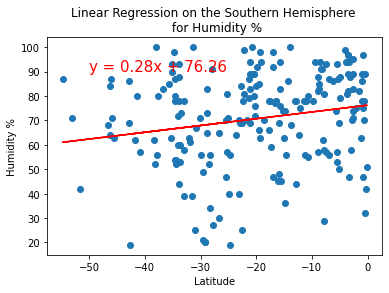

(0.2774680358395814,
 76.26129153996438,
 0.19074162176567838,
 0.006545300988404615,
 0.10097290718902972)

In [64]:
# perform a linear regression for the southern hemisphere - HUMIDITY
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Humidity %", "Humidity %", (-50,90))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

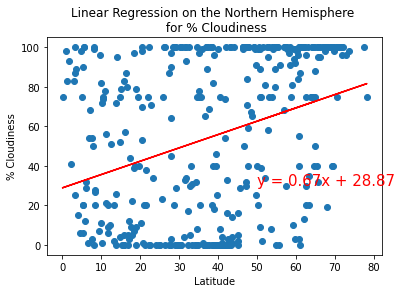

(0.6742324984218597,
 28.870195487854243,
 0.33504157953982033,
 4.196258316441355e-11,
 0.09910945151496203)

In [65]:
# perform a linear regression for the northern hemisphere - CLOUDINESS
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (50,30))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

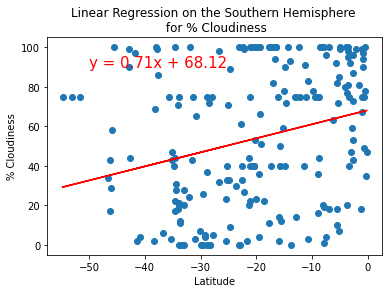

(0.7095588579975198,
 68.11995608680427,
 0.2690832298677419,
 0.0001078030429778415,
 0.17958324386721874)

In [66]:
# perform a linear regression for the southern hemisphere - CLOUDINESS
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,90))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

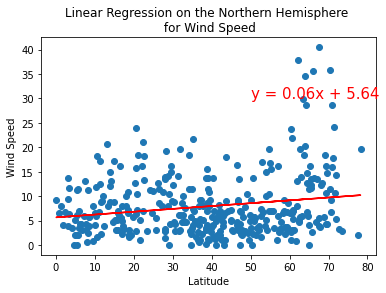

(0.058146597803853325,
 5.641486206919566,
 0.18032566145166432,
 0.000508925041051309,
 0.016578598975822808)

In [68]:
# perform a linear regression for the northern hemisphere - WIND SPEED
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (50,30))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)

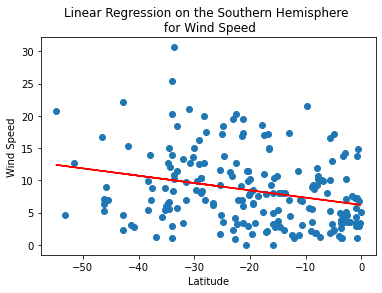

(-0.11314154566380535,
 6.197128563181701,
 -0.26750413199615225,
 0.00011873164867402916,
 0.028817340389228972)

In [69]:
# perform a linear regression for the southern hemisphere - WIND SPEED
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed", (-50,90))

# check r-values
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
(slope, intercept, r_value, p_value, std_err)